In [144]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija


In [147]:
def load_data():
  train_data = pd.read_csv('../pretprocesiranje/train_data.csv')
  test_data = pd.read_csv('../pretprocesiranje/test_data.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_val = np.array(X_val)
  y_val = np.array(y_val)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_val, y_train, y_val, X_test, y_test

In [148]:
def create_and_describe(inputs, outputs):
  model = Model(inputs=inputs, outputs=outputs)

  # ovi parametri ostaju isti
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
  )

  model.summary()

  return model

In [149]:
def model_fit(X_train, y_train, X_test, y_test, batch_size, epochs, model):

  if isinstance(batch_size, int):
        batch_size = [batch_size] 

  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  for batch in batch_size:
    history = model.fit(
      X_train,
      y_train,
      batch_size=batch,
      epochs=epochs,
      validation_data=(X_val, y_val),
  )
    losses.append(history.history['loss'])
    accuracies.append(history.history['accuracy'])
    val_losses.append(history.history['val_loss'])
    val_accuracies.append(history.history['val_accuracy'])

  return losses, accuracies, val_losses, val_accuracies

In [150]:
def plot_metrics(losses, accuracies, val_losses, val_accuracies):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  #losses
  ax1.plot(losses[0], label='Training Loss')
  ax1.plot(val_losses[0], label='Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  #accuracies
  ax2.plot(accuracies[0], label='Training Accuracy')
  ax2.plot(val_accuracies[0], label='Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  plt.tight_layout()
  plt.show()

In [151]:
X_train, X_val, y_train, y_val, X_test, y_test = load_data()

In [152]:
compare_loss = []
compare_val_loss = []
compare_accuracy = []
compare_val_accuracy = []

#**Multilayer Perceptron**

#BaselineModel

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


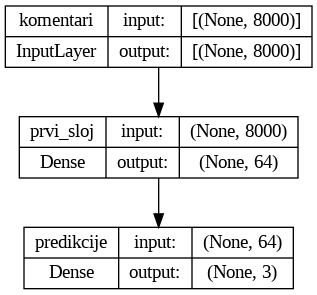

In [153]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

baseline_model = create_and_describe(inputs=inputs, outputs=outputs)
plot_model(baseline_model,show_shapes=True)

In [154]:
batch_size = [32, 64, 128]
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=10, model=baseline_model)

Epoch 1/10
213/213 [==============================] - 2s 4ms/step - loss: 0.9852 - accuracy: 0.5323 - val_loss: 0.8027 - val_accuracy: 0.6938
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 0.6047 - accuracy: 0.7926 - val_loss: 0.6296 - val_accuracy: 0.7326
Epoch 3/10
213/213 [==============================] - 1s 6ms/step - loss: 0.3891 - accuracy: 0.8622 - val_loss: 0.6260 - val_accuracy: 0.7314
Epoch 4/10
213/213 [==============================] - 1s 6ms/step - loss: 0.2891 - accuracy: 0.8950 - val_loss: 0.6584 - val_accuracy: 0.7238
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 0.2331 - accuracy: 0.9128 - val_loss: 0.7051 - val_accuracy: 0.7185
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1996 - accuracy: 0.9211 - val_loss: 0.7516 - val_accuracy: 0.7120
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9259 - val_loss: 0.8002 - val_accuracy: 0.7055
Epoch 

In [155]:
batch_sizes = [32,64,128]

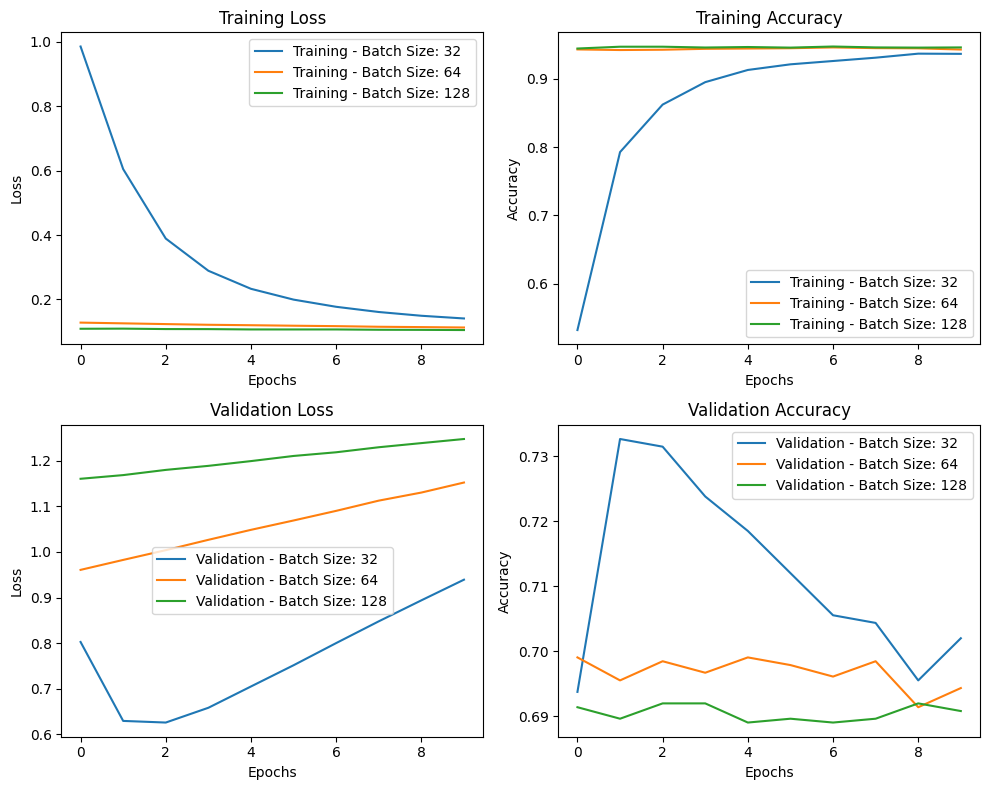

In [156]:
plt.figure(figsize=(10, 8))

# training loss
plt.subplot(2, 2, 1)
for i in range(len(batch_sizes)):
    plt.plot(losses[i], label=f'Training - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# training accuracy
plt.subplot(2, 2, 2)
for i in range(len(batch_sizes)):
    plt.plot(accuracies[i], label=f'Training - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# validation loss
plt.subplot(2, 2, 3)
for i in range(len(batch_sizes)):
    plt.plot(val_losses[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

# validation accuracy
plt.subplot(2, 2, 4)
for i in range(len(batch_sizes)):
    plt.plot(val_accuracies[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


overfiting u sva 3 slucaja lmao, u proseku mozda najbolje za batch=64

In [157]:
compare_loss.append(losses[1][-1])
compare_val_loss.append(val_losses[1][-1])
compare_accuracy.append(accuracies[1][-1])
compare_val_accuracy.append(val_accuracies[1][-1])

#Deep network

In [158]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dp_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [159]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=dp_model)

Epoch 1/10
107/107 [==============================] - 2s 7ms/step - loss: 0.9974 - accuracy: 0.4878 - val_loss: 0.7733 - val_accuracy: 0.7309
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 0.5185 - accuracy: 0.7962 - val_loss: 0.6498 - val_accuracy: 0.7232
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 0.2738 - accuracy: 0.8932 - val_loss: 0.7516 - val_accuracy: 0.7214
Epoch 4/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1973 - accuracy: 0.9189 - val_loss: 0.8626 - val_accuracy: 0.7167
Epoch 5/10
107/107 [==============================] - 1s 6ms/step - loss: 0.1632 - accuracy: 0.9299 - val_loss: 0.9675 - val_accuracy: 0.7067
Epoch 6/10
107/107 [==============================] - 1s 11ms/step - loss: 0.1433 - accuracy: 0.9343 - val_loss: 1.0112 - val_accuracy: 0.7067
Epoch 7/10
107/107 [==============================] - 1s 12ms/step - loss: 0.1343 - accuracy: 0.9353 - val_loss: 1.0702 - val_accuracy: 0.7014
Epoc

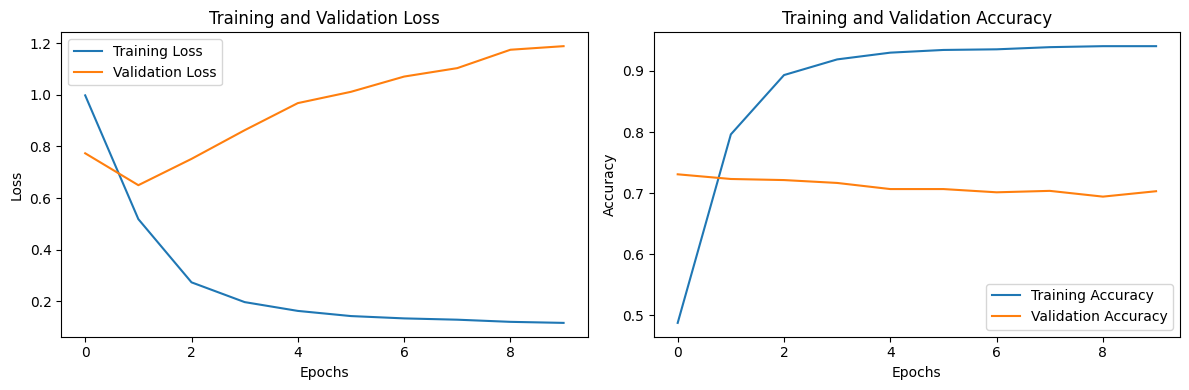

In [160]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

i dalje prelose al smirio se val

In [161]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#L2 regularizacija

In [162]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.03))(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

l2_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [163]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=l2_model)

Epoch 1/10
107/107 [==============================] - 2s 7ms/step - loss: 1.3669 - accuracy: 0.4171 - val_loss: 1.0787 - val_accuracy: 0.4181
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0753 - accuracy: 0.4766 - val_loss: 1.0684 - val_accuracy: 0.5571
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0555 - accuracy: 0.5627 - val_loss: 1.0598 - val_accuracy: 0.5819
Epoch 4/10
107/107 [==============================] - 1s 5ms/step - loss: 0.9927 - accuracy: 0.6577 - val_loss: 1.0402 - val_accuracy: 0.6508
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 0.9357 - accuracy: 0.7054 - val_loss: 1.0488 - val_accuracy: 0.6714
Epoch 6/10
107/107 [==============================] - 1s 6ms/step - loss: 0.8867 - accuracy: 0.7499 - val_loss: 1.0051 - val_accuracy: 0.6967
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 0.8200 - accuracy: 0.7831 - val_loss: 1.0536 - val_accuracy: 0.6885
Epoch 

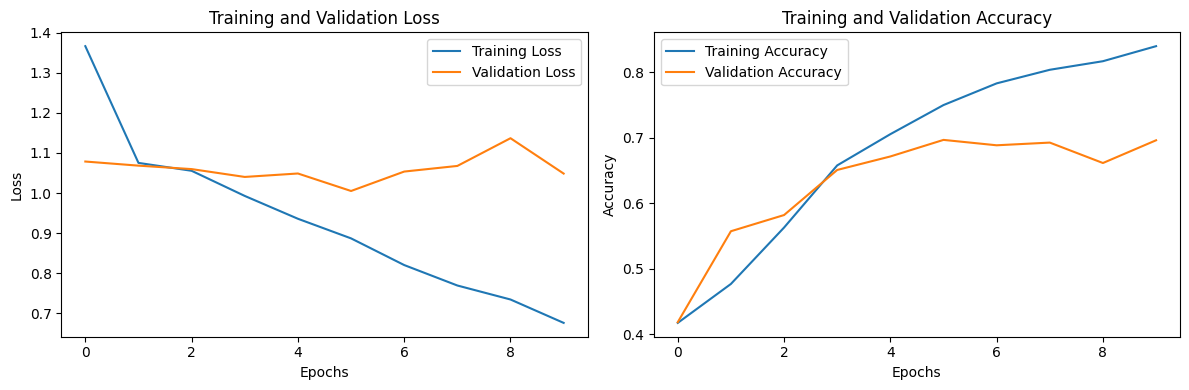

In [164]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

malo se stabilizovao



In [165]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#Dropout regularizacija

In [166]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5, name="dropout1")(x)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dropout(0.5, name="dropout2")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dropout_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 dropout1 (Dropout)          (None, 32)                0         
                                                                 
 drugi_sloj (Dense)          (None, 32)                1056      
                                                                 
 dropout2 (Dropout)          (None, 32)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 257,187
Trainable params: 257,187
Non-traina

In [167]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=dropout_model)

Epoch 1/10
107/107 [==============================] - 3s 8ms/step - loss: 1.0805 - accuracy: 0.4082 - val_loss: 1.0547 - val_accuracy: 0.4199
Epoch 2/10
107/107 [==============================] - 0s 5ms/step - loss: 0.9763 - accuracy: 0.5389 - val_loss: 0.8313 - val_accuracy: 0.6667
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 0.7391 - accuracy: 0.7006 - val_loss: 0.6750 - val_accuracy: 0.7303
Epoch 4/10
107/107 [==============================] - 1s 6ms/step - loss: 0.5704 - accuracy: 0.7781 - val_loss: 0.6368 - val_accuracy: 0.7314
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 0.4575 - accuracy: 0.8355 - val_loss: 0.6407 - val_accuracy: 0.7238
Epoch 6/10
107/107 [==============================] - 1s 6ms/step - loss: 0.3804 - accuracy: 0.8560 - val_loss: 0.6678 - val_accuracy: 0.7244
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 0.3343 - accuracy: 0.8739 - val_loss: 0.7011 - val_accuracy: 0.7203
Epoch 

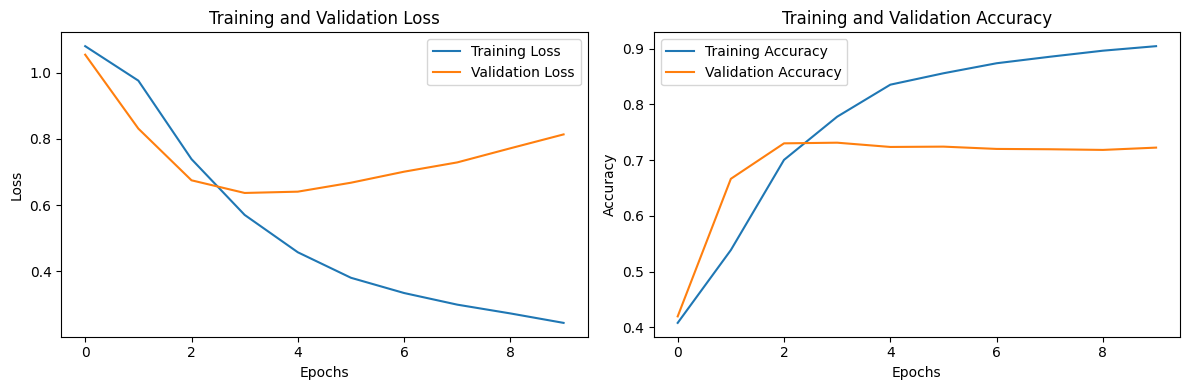

In [168]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [169]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

#l2 + dropout :) 

In [170]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.03))(inputs)
#x = Dropout(0.5, name="dropout1")(x)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dropout(0.5, name="dropout2")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 drugi_sloj (Dense)          (None, 32)                1056      
                                                                 
 dropout2 (Dropout)          (None, 32)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 257,187
Trainable params: 257,187
Non-trainable params: 0
_________________________________________________________________


In [171]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=64, epochs=10, model=reg_model)

Epoch 1/10
107/107 [==============================] - 3s 9ms/step - loss: 1.2310 - accuracy: 0.4121 - val_loss: 1.0781 - val_accuracy: 0.4181
Epoch 2/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0817 - accuracy: 0.4331 - val_loss: 1.0763 - val_accuracy: 0.4205
Epoch 3/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0791 - accuracy: 0.4729 - val_loss: 1.0648 - val_accuracy: 0.5577
Epoch 4/10
107/107 [==============================] - 1s 6ms/step - loss: 1.0599 - accuracy: 0.5368 - val_loss: 1.0398 - val_accuracy: 0.5830
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0327 - accuracy: 0.5775 - val_loss: 1.0198 - val_accuracy: 0.5607
Epoch 6/10
107/107 [==============================] - 1s 5ms/step - loss: 1.0061 - accuracy: 0.5934 - val_loss: 1.0078 - val_accuracy: 0.5872
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 0.9798 - accuracy: 0.6221 - val_loss: 1.0009 - val_accuracy: 0.5842
Epoch 

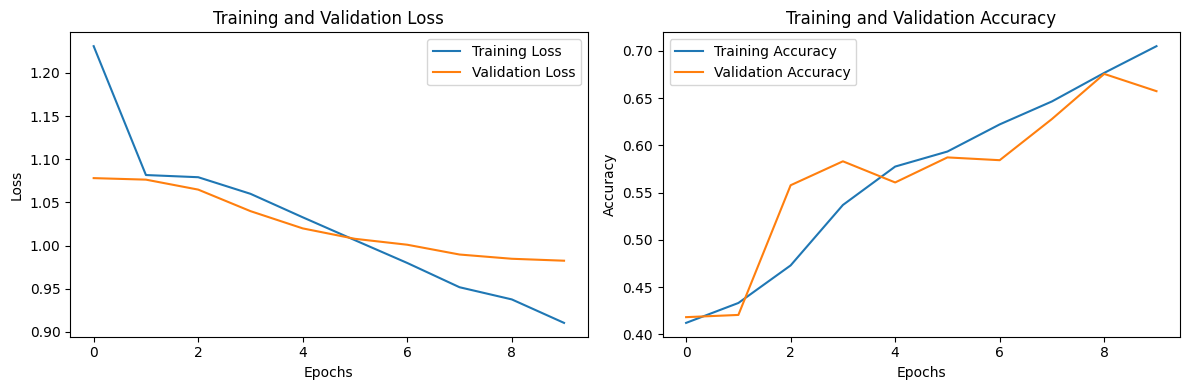

In [172]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [173]:
compare_loss.append(losses[0][-1])
compare_val_loss.append(val_losses[0][-1])
compare_accuracy.append(accuracies[0][-1])
compare_val_accuracy.append(val_accuracies[0][-1])

<Figure size 500x500 with 0 Axes>

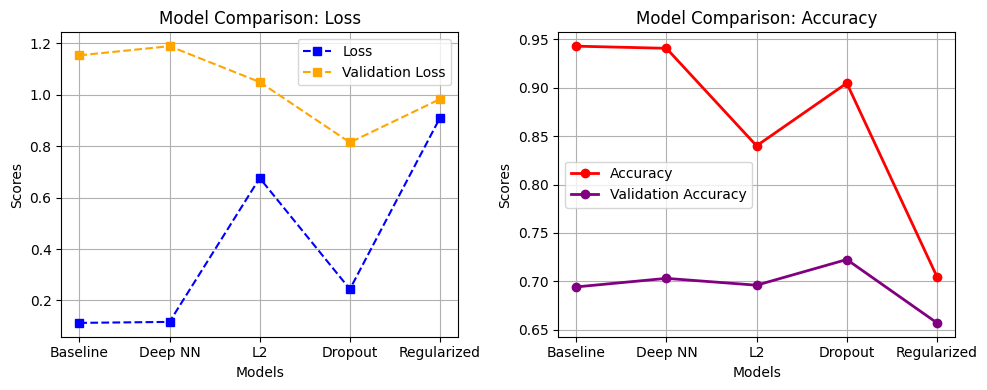

In [175]:
model_names = ['Baseline', 'Deep NN', 'L2', 'Dropout', 'Regularized']
plt.figure(figsize=(5, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(model_names, compare_loss, marker='s', linestyle='--', color='blue', label='Loss')
ax1.plot(model_names, compare_val_loss, marker='s', linestyle='--', color='orange', label='Validation Loss')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison: Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(model_names, compare_accuracy, marker='o', linestyle='-', linewidth=2, color='red', label='Accuracy')
ax2.plot(model_names, compare_val_accuracy, marker='o', linestyle='-', linewidth=2, color='purple', label='Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Comparison: Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()

-------------------najbolja arhitektura-------------------

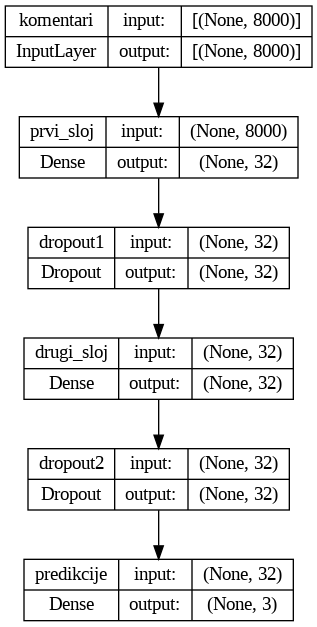

In [176]:
plot_model(dropout_model,show_shapes=True)

#Test skup

In [177]:
test_scores = dropout_model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

50/50 - 0s - loss: 0.5504 - accuracy: 0.8272 - 125ms/epoch - 3ms/step
Test loss: 0.5504140853881836
Test accuracy: 0.8272383213043213
